In [1]:
# import necessary packages
from utils import*

In [ ]:
# Download Dataset and Model linked in the Read Me file into the respective folders and modify the paths accordingly
data_dir = '/mountvol/igib-dataset-160-5G' #Change Data Directory 
model_path = data_dir + '/planningoperator_env160_m12_w32_l1_b5_lr3e-3_5g_30nov_2224/n320_lr3.000000e-03_gamma6.000000e-01_wd3.000000e-06_seed5/model3d.ckpt' #Change Model Directory

Load and Pre-Process the dataset

In [ ]:
Ntotal = 32*10+8*10
ntrain = 32*10
ntest = 8*10
sub = 1
Sx = int(((160 - 1) / sub) + 1)
Sy = Sx
Sz = int(((62 - 1) / sub) + 1)
smooth_coef = 1.0
batch_size = 1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess
mask, dist_in, output, goals = load_raw_data(data_dir=data_dir, Ntotal=Ntotal)
train_data, test_data = preprocess_data(mask, dist_in, output, goals, smooth_coef, sub, Sx, Sy, Sz, ntrain, ntest)
train_loader, test_loader = get_dataloaders(train_data, test_data)

Load the trained Model

In [7]:
model = load_pno_model(model_path, modes=12, width=32, nlayers=1)

Plot predicted and ground truth - Train Set

Sample 1 - Relative Error: 0.0710


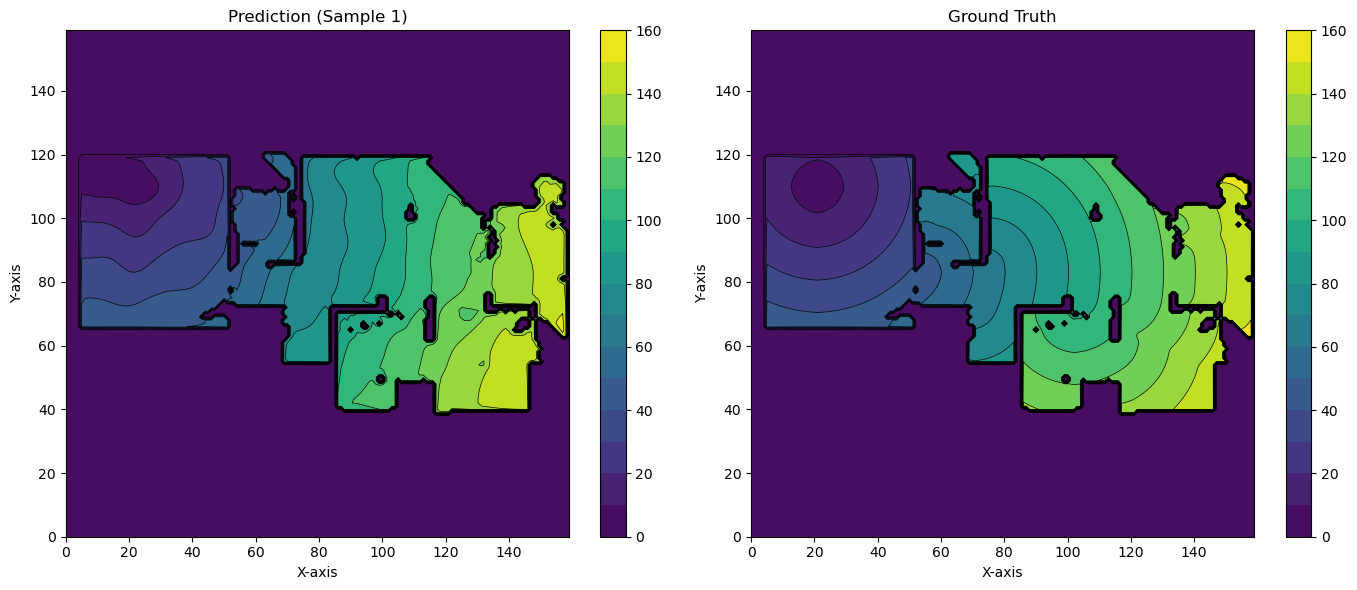

In [8]:
plot_model_output(model, train_loader, device, n_samples=1, slice_axis=2, contour_levels=15)

Plot predicted and ground truth - Test Set

Sample 1 - Relative Error: 0.0962


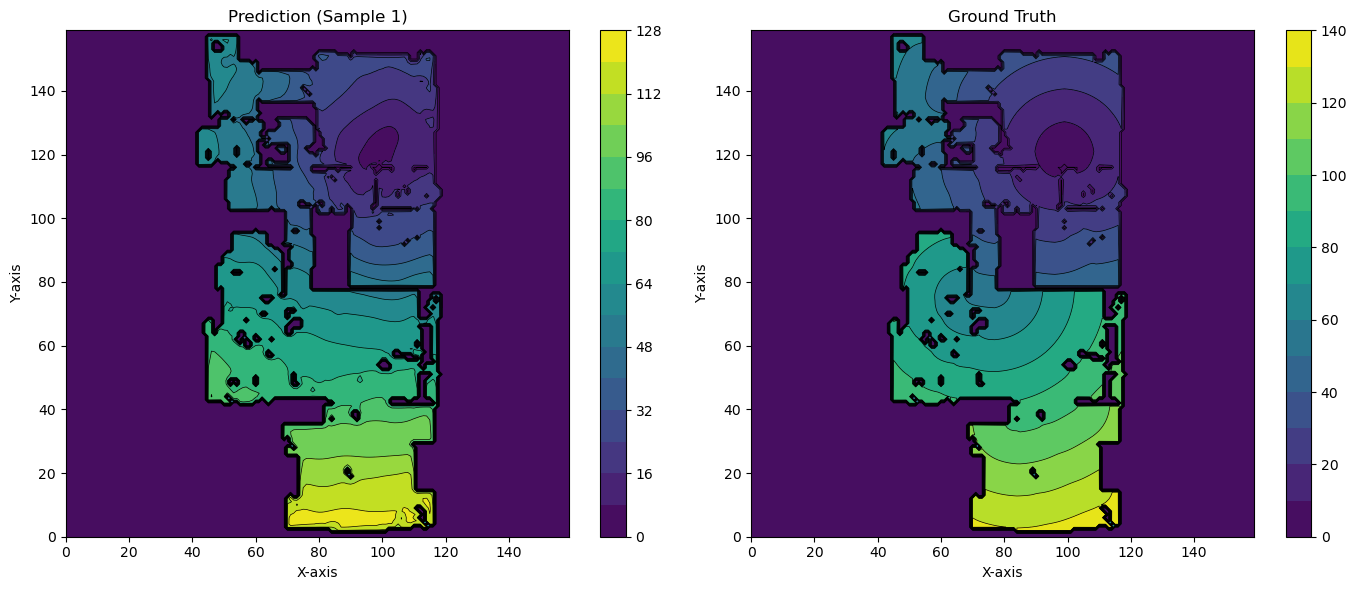

In [6]:
plot_model_output(model, test_loader, device, n_samples=1, slice_axis=2, contour_levels=15)